## 支持向量机

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC #分类算法
from sklearn import datasets

#### 创建数据


In [15]:
x,y = datasets.make_blobs(n_samples=100, #样本量
                   n_features=2, #二个特征
                   centers=2, #两类
                   random_state=3) #随即数状态，固定了

display(x.shape,y.shape,np.unique(y))

(100, 2)

(100,)

array([0, 1])

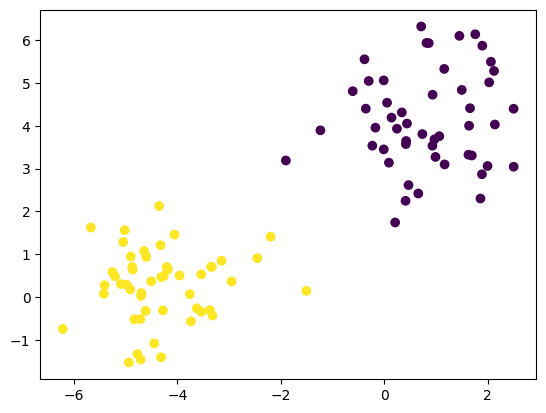

In [16]:
plt.scatter(x[:,0],x[:,1],c=y)

In [17]:
svc = SVC(kernel='linear') #kernel表示核函数 linear线性
svc.fit(x,y)
svc.score(x,y)

1.0

#### 绘制分割线

In [18]:
b_ = svc.intercept_
w_ = svc.coef_


<font size=6>$y = - \frac{w_1}{w_2} x - \frac{b}{w_2}$</font>

In [19]:
w = -w_[0,0] / w_[0,1]
b = -b_ / w_[0,1]
display(w,b)

np.float64(-0.6853798435538032)

array([0.89870983])

In [24]:
sv = svc.support_vectors_
sv

array([[ 0.21219196,  1.74387328],
       [-1.8997797 ,  3.19111595],
       [-2.19341554,  1.41161044]])

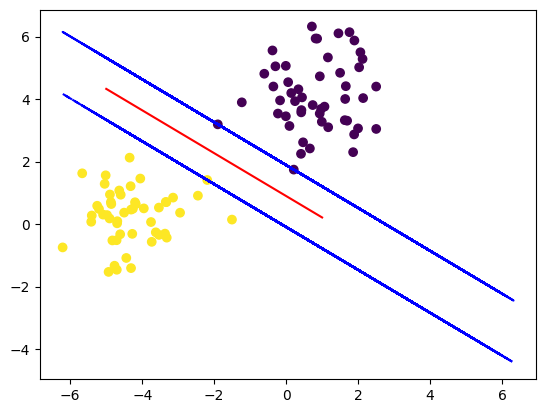

In [38]:
x_ = np.linspace(-5,1,100)

f = lambda x: w * x + b

plt.scatter(x[:,0],x[:,1],c=y)

plt.plot(x_,f(x_),color='red')

#上边界
b1 = sv[0][1] - w * sv[0][0]
plt.plot(x,w * x + b1,color='blue',ls='solid')
#下边界
b2 = sv[-1][1] - w * sv[-1][0]
plt.plot(x,w * x + b2,color='blue',ls='--')